In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import sinvchi2
import plot_tools

## Question 1

## Inference for normal mean and deviation (3 points)
A factory has a production line for manufacturing car windshields. A sample of windshields
has been taken for testing hardness. The observed hardness values y1 can be found in file
windshieldy1.txt. The data can also be accessed from the aaltobda R package as follows:

library(aaltobda)

data("windshieldy1")

head(windshieldy1)

 [1] 13.357 14.928 14.896 15.297 14.820 12.067
 
 
We may assume that the observations follow a normal distribution with an unknown standard
deviation σ. We wish to obtain information about the unknown average hardness µ. For simplicity
we assume standard uninformative prior discussed in the book, that is, p(µ, σ) ∝ σ−1
. 
It is not necessary to derive the posterior distribution in the report, as it has already been done in the book.
Below are test examples that can be used. The functions below can also be tested with markmyassignment.
Note! This is only a test case. You need to change to the full data windshieldy above when  reporting your results.

windshieldy_test <- c(13.357, 14.928, 14.896, 14.820)

In the report, formulate (1) model likelihood, (2) the prior, and (3) the resulting posterior.

a) What can you say about the unknown µ? Summarize your results using Bayesian point estimate
(i.e. E(µ|y)), a posterior interval (95%), and plot the density. A test example can be found
below for an uninformative prior. Note! Posterior intervals are also called credible intervals and
are different from confidence intervals.

mu_point_est(data = windshieldy_test)

 [1] 14.5
 
mu_interval(data = windshieldy_test, prob = 0.95)

 [1] 13.3 15.7
 
b) What can you say about the hardness of the next windshield coming from the production line
before actually measuring the hardness? Summarize your results using Bayesian point estimate,
a predictive interval (95%), and plot the density. A test example can be found below.

mu_pred_point_est(data = windshieldy_test)

 [1] 14.5
 
mu_pred_interval(data = windshieldy_test, prob = 0.95)

 [1] 11.8 17.2

## Data

In [4]:
#test data!
y =[13.357, 14.928, 14.896, 14.820]

In [17]:
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # here ddof=1 is used to get the sample estimate
my = np.mean(y)

In [18]:
my, s2

(14.50025, 0.5829495833333344)

In [26]:
t=[6,13]
t1 = np.linspace(tl1[0], tl1[1], 100)

# compute the exact marginal density for mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)

# compute the exact marginal density for mu for the filtered data
# pm_mu_pos = (
#     stats.t.pdf((t1 - my_pos) / np.sqrt(s2_pos/n_pos), n_pos-1) /
#     np.sqrt(s2_pos/n_pos)
# )

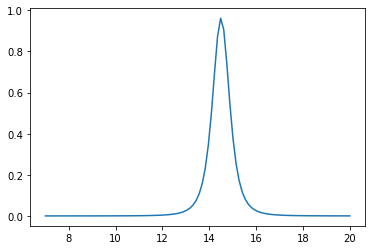

In [30]:
plt.plot(t1, pm_mu)

In [43]:
# set random number generator with seed
rng = np.random.RandomState(seed=0)

sigma2 = sinvchi2.rvs(n-1, s2, size=100000, random_state=rng)
# sample from p(mu|sigma2,y) 
mu = my + np.sqrt(sigma2/n)*rng.randn(*sigma2.shape)
# display sigma instead of sigma2
sigma = np.sqrt(sigma2)

In [57]:
np.median(mu)

14.49892168880364

In [58]:
np.median(sigma)

0.8575364579859606

In [47]:
conf_level=0.95
interval_upper=stats.norm.ppf(conf_level+(1-conf_level)/2, np.median(mu), np.median(sigma))
inteval_lower=stats.norm.ppf((1-conf_level)/2, np.median(mu), np.median(sigma))
inteval_lower, interval_upper

(12.818181115721112, 16.17966226188617)

In [50]:
stats.bayes_mvs(y)

(Mean(statistic=14.50025, minmax=(13.601840152074931, 15.398659847925067)),
 Variance(statistic=1.7488487500000032, minmax=(0.2237888217800168, 4.970490415210898)),
 Std_dev(statistic=1.055154819507702, minmax=(0.4730632323273674, 2.22945966889085)))